In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (23).JPG
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (11).JPG
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (22).jpg
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (26).jpg
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (18).jpg
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (17).jpg
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (7).JPG
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (2).jpg
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (27).jpg
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (30).JPG
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (6).JPG
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (16).JPG
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (21).JPG
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (10).JPG
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (1).JPG

# **Define Input, Output Paths, and Create Working Directory**

In [2]:
# Path to the folder containing the original images
input_dir = "/kaggle/input/augmented-pimple-data/Pimple dataset"

# Path to the folder where the original + augmented images will be stored
output_dir = "/kaggle/working/Augmented Pimple dataset"

# Path for the final zip file
zip_filename = "/kaggle/working/Augmented Pimple dataset.zip"

# Create output directory if it doesn't already exist
os.makedirs(output_dir, exist_ok=True)

# **Check Dataset Folder and Count Images**

In [4]:
base_folder = "/kaggle/input/augmented-pimple-data/Pimple dataset"

# List all files in the folder
image_files = []
for root, dirs, files in os.walk(base_folder):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_files.append(os.path.join(root, file))
            
print(f"Found {len(image_files)} images in folder '{base_folder}'")

# Display a few sample image paths
if image_files:
    print("\nSample image paths:")
    for i in range(min(5, len(image_files))):
        print(image_files[i])

Found 36 images in folder '/kaggle/input/augmented-pimple-data/Pimple dataset'

Sample image paths:
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (23).JPG
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (11).JPG
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (22).jpg
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (26).jpg
/kaggle/input/augmented-pimple-data/Pimple dataset/Pimple (18).jpg


# **Define and Apply Image Augmentation Techniques**

In [5]:
from PIL import Image, ImageFilter
import math
import shutil
from tqdm import tqdm

# Augmentation function: vertical flip
def vertical_flip(image):
    return image.transpose(Image.FLIP_TOP_BOTTOM)

# Augmentation function: rotate 90 degrees
def rotate_90(image):
    return image.rotate(90, expand=True)

# Augmentation function: shear by a given degree
def shear_image(image, shear_degree):
    width, height = image.size
    m = math.tan(math.radians(shear_degree))
    xshift = abs(m) * height
    new_width = width + int(round(xshift))
    return image.transform(
        (new_width, height),
        Image.AFFINE,
        (1, m, -xshift if shear_degree > 0 else 0, 0, 1, 0),
        Image.BICUBIC
    )

# Augmentation function: apply Gaussian blur
def apply_blur(image, radius):
    return image.filter(ImageFilter.GaussianBlur(radius))

# Create directory to save augmented images
augmented_folder = f"/kaggle/working/{os.path.basename(base_folder)}_augmented"
os.makedirs(augmented_folder, exist_ok=True)

# Copy original images to the augmented folder
print("Copying original images...")
for img_path in tqdm(image_files):
    shutil.copy(img_path, os.path.join(augmented_folder, os.path.basename(img_path)))

# Apply augmentations and save
print("\nApplying augmentations...")
aug_count = 0

for img_path in tqdm(image_files):
    try:
        img = Image.open(img_path)
        name, ext = os.path.splitext(os.path.basename(img_path))

        # Vertical Flip
        vertical_flip(img).save(os.path.join(augmented_folder, f"{name}_vflip{ext}"))
        aug_count += 1

        # Rotate 90°
        rotate_90(img).save(os.path.join(augmented_folder, f"{name}_rot90{ext}"))
        aug_count += 1

        # Shear by -10 degrees
        shear_image(img, -10).save(os.path.join(augmented_folder, f"{name}_shearN10{ext}"))
        aug_count += 1

        # Gaussian Blur (radius 1.5)
        apply_blur(img, 1.5).save(os.path.join(augmented_folder, f"{name}_blur{ext}"))
        aug_count += 1

    except Exception as e:
        print(f"Error augmenting {img_path}: {e}")

# Summary
print(f"\nAugmentation complete!")
print(f"Original images: {len(image_files)}")
print(f"Augmented images created: {aug_count}")
print(f"Total images in folder: {len(os.listdir(augmented_folder))}")


Copying original images...


100%|██████████| 36/36 [00:00<00:00, 235.37it/s]



Applying augmentations...


100%|██████████| 36/36 [00:02<00:00, 14.49it/s]


Augmentation complete!
Original images: 36
Augmented images created: 144
Total images in folder: 180


#  Resize all augmented images to 224×224 and convert them to PNG format.

In [6]:
from PIL import Image
from tqdm import tqdm

# Define input and output folders
input_folder = augmented_folder  # from Cell 3
output_folder = f"{augmented_folder}_resized"
os.makedirs(output_folder, exist_ok=True)

print(f"Resizing and converting images in: {input_folder}")
for img_name in tqdm(os.listdir(input_folder)):
    img_path = os.path.join(input_folder, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize((224, 224))
            base_name = os.path.splitext(img_name)[0]  # remove extension
            img.save(os.path.join(output_folder, base_name + '.png'), format='PNG')
        except Exception as e:
            print(f"Error processing {img_name}: {e}")


Resizing and converting images in: /kaggle/working/Pimple dataset_augmented


100%|██████████| 180/180 [00:05<00:00, 30.88it/s]


# **Zip the Augmented Dataset**

In [7]:
import zipfile  # Ensure zipfile is imported

zip_filename = f"{augmented_folder}.zip"

print(f"Creating zip file: {zip_filename}")
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, files in os.walk(augmented_folder):
        for file in files:
            file_path = os.path.join(root, file)
            # Add file to zip with path relative to augmented_folder
            arcname = os.path.relpath(file_path, augmented_folder)
            zipf.write(file_path, arcname)

print(f"Successfully created {zip_filename}")
print("You can now download this file from the Kaggle notebook interface.")


Creating zip file: /kaggle/working/Pimple dataset_augmented.zip
Successfully created /kaggle/working/Pimple dataset_augmented.zip
You can now download this file from the Kaggle notebook interface.


# **Verify Zip File Contents**

In [8]:
with zipfile.ZipFile(zip_filename, 'r') as zipf:
    file_list = zipf.namelist()
    print(f"Number of files in zip: {len(file_list)}")
    print("\nSample files in zip:")
    for file in file_list[:5]:
        print(file)

Number of files in zip: 180

Sample files in zip:
Pimple (14)_blur.jpg
Pimple (14)_rot90.jpg
Pimple (20)_blur.JPG
Pimple (25)_shearN10.jpg
Pimple (12)_vflip.JPG


# **Display Original and Augmented (Flipped) Image Samples**

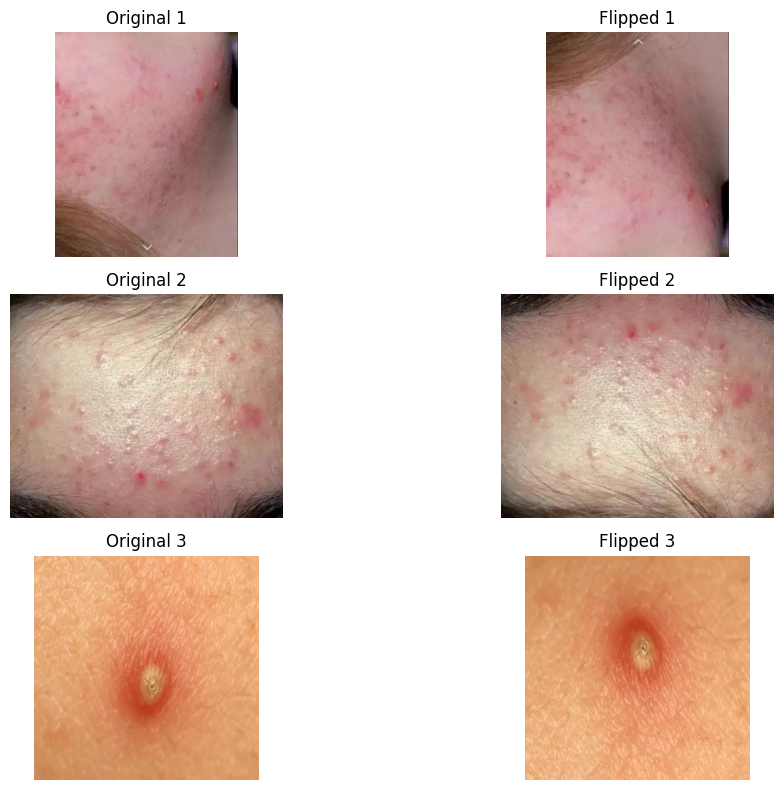

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

plt.figure(figsize=(12, 8))

# Get a few sample original images
sample_original_paths = image_files[:3]
for i, img_path in enumerate(sample_original_paths):
    plt.subplot(3, 2, 2*i+1)
    img = Image.open(img_path)
    plt.imshow(np.array(img))
    plt.title(f"Original {i+1}")
    plt.axis('off')
    
    # Get the corresponding vertically flipped image
    filename = os.path.basename(img_path)
    name, ext = os.path.splitext(filename)
    flipped_filename = f"{name}_vflip{ext}"  # Use "_vflip" since that's what we saved
    flipped_path = os.path.join(augmented_folder, flipped_filename)
    
    plt.subplot(3, 2, 2*i+2)
    if os.path.exists(flipped_path):
        flipped_img = Image.open(flipped_path)
        plt.imshow(np.array(flipped_img))
        plt.title(f"Flipped {i+1}")
    else:
        plt.title("Flipped image not found")
    plt.axis('off')

plt.tight_layout()
plt.show()
